# Deep Reinforcement Learning

DeepMind Paper에 따르면 마지막 4개의 마지막 스크린을 84*84 싸이즈의 256 grayscale로 변환해줍니다.<br>
즉 states로 $ 256^{4 * 84 * 84} = 10^{67970} $의 game states가 나올수 있으며 Q-table을 사용한다면 rows값으로 사용 될 것입니다.<br>
해당 값은 현재 알려진 원자의 갯수보다도 더 많습니다. 

바로 이부분, Q-function을 neural network로 대체하는것이 DeepMind paper에서 주장하는 것입니다. <br>
아래의 figure는 구글 딥마인드에서 사용한 CNN의 구조입니다.

<img src="images/deep-q-learning-used-by-deepmind.png" class="img-responsive img-rounded">

특이한점은 Pooling Layers가 없습니다. 이유는 pooling layers를 할 시, 게임속 objects들의 위치를 알 방법이 없어지게 됩니다.<br>
따라서 Deep Reinforcement를 할때 CNN에서는 pooling layers를 제거합니다.


### Deep Q-Learning

Value function을 Deep Q-network로 나타냅니다. (weights $ \theta $ 가 추가되고, 오른쪽은 기존 value function)

###  $$ Q(s, a; \theta) \approx Q^{\pi}(s, a) $$



### Loss Function

### $$ target = y_i =  r + \gamma \cdot max_{a^{\prime}} Q(s^{\prime}, a^{\prime} ; \theta_{i-1}) $$
### $$ L_i (\theta_i) = \frac{1}{2}[ y_i  - Q(s, a; \theta_{i}) ]^{2} $$ 

Q-Learning에서 q-table update는 다음과 같이 변경이 됩니다. 

1. predicted q-values (뉴럴넷을 통해 나온 actions 값들)를 현재의 state s 로부터 feedforward pass를 통해서 알아냅니다. 
2. 다음 state $ s^{\prime} $ 대해서 feedforward pass를 하고, network outputs에서 가장 큰값 $ max_{a^{\prime}} Q(s^{\prime}, a^{\prime}) $ 을 계산합니다. 
3. action에 대한 Q-value target을 $ r  + \gamma \cdot max_{a^{\prime}} Q(s^{\prime}, a^{\prime}) $
4. Set Q-value target for action to r + γmax a’ Q(s’, a’) (use the max calculated in step 2). For all other actions, set the Q-value target to the same as originally returned from step 1, making the error 0 for those outputs.
5. Backpropagation을 통해서 update를 합니다.


### Defferntiating the loss function

### $$ \nabla_{\theta_i} L_i(\theta_i) = \sum[ ( r + \gamma \cdot max(a^{\prime}) Q(s^{\prime}, a^{\prime}; \theta_{i-1}) - Q(s, a; \theta_i)) \nabla_{\theta_i} Q(s, a; \theta_i)] $$ 


### Experience Replay

전체 플레이 데이터를 저장하고, random minibatch를 통해서 트레이닝을 시킵니다. 이는 연속적인 samples들의 유사성을 없애기 때문에 local minimum에 빠지는 상황을 방지할수 있습니다. 또한 experience replay를 통해서 supervised learning처럼 할 수 있으며, debugging, testing을 좀 더 쉽게 할 수 있습니다. 가장 좋은 점은 인간한 게임 플레이를 통해서 경험을 쌓게 할 수 도 있습니다. 

1. Experience라는것은 일련의 $ s_t, a_t, r_t, s_{t+1}, a_{t+1}, r_{t+1} ... $ 같은 것들을 모음.
2. Experience $ e_t = (s_t, a_t, r_t, s_{t+1} ) $ 를 every time-step때마다, data-set $ D = e_1, ... e_N $에다가 저장을 합니다.


### ε-greedy exploration

Agent가 처음에는 random하게 행동을 하지만, 시간이 지남에 따라서 점차 random보다는 가장 높은 q-value값을 선택하도록 하는 것이 좋습니다.
딥마인드에서도 처음에는 ε 값을 1로 잡았다가.. 이 값을 0.1로 점차 줄여나갑니다. 

### Pseudo Code

[Toronto DQN](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)

<img src="images/deep-q-learning-algorithm-pseudo-code.png" class="img-responsive img-rounded">

In [1]:
%pylab inline
import environment 
import replay 
import agent
from time import sleep
from IPython.display import display, clear_output
from pprint import pprint as pp

reload(environment)
reload(replay)
reload(agent)
        
env = environment.Environment('Breakout-v0')
replay = replay.ExperienceReplay(env)
agent = agent.Agent(env, replay)

Populating the interactive namespace from numpy and matplotlib
hdf5 not supported (please install/reinstall h5py)


[2016-11-23 17:18:26,532] Making new env: Breakout-v0


(84, 84)


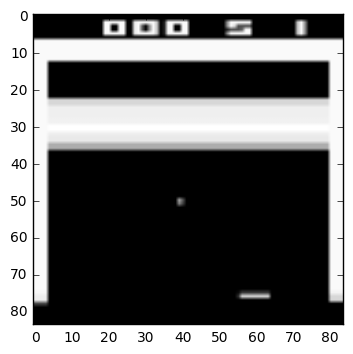

In [3]:
action = env.random_action()
screen, reard, done, info = env.step(action)

pylab.imshow(screen, cmap='Greys_r')
print screen.shape

### References 

* [ICLR - Deep Reinforcement Learning](http://www.iclr.cc/lib/exe/fetch.php?media=iclr2015:silver-iclr2015.pdf)
* [Carpedm20 - Deep-rl-tensorflow](https://github.com/carpedm20/deep-rl-tensorflow)